In [86]:
#Logistic regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
train_data = pd.read_csv('Titanic Dataset/train.csv')
test_data = pd.read_csv('Titanic Dataset/test.csv')

In [88]:
train_data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [89]:
test_data.head(2)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [90]:
print('The number of samples for the training data is {}.'.format(train_data.shape[0]))
print('The number of samples for the testing data is {}.'.format(test_data.shape[0]))


The number of samples for the training data is 891.
The number of samples for the testing data is 418.


## Data Preprocessing

### Data Preprocessing on training set

#### Counting the number of null values in our data:

In [91]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Filling the missing null values with the mean of the age

In [92]:
train_data["Age"].mean(skipna = True)

29.69911764705882

In [93]:
train_data["Age"].fillna

<bound method Series.fillna of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [94]:
train_data["Age"].fillna(train_data["Age"].mean(skipna = True), inplace = True)

In [95]:
train_data["Age"].isnull().sum()


0

#### Handling embarked

In [96]:
train_data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [97]:
train_data["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [98]:
train_data["Embarked"].value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

###### Filling the missing embarked data with the most occurred value ie S
##### Since 2 is very small compared to total 891 values, we can safely assume that the missing values are S (max)

In [99]:
train_data["Embarked"].fillna("S", inplace = True)

In [100]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [101]:
train_data["Embarked"].shape[0]

891

###### 687 out of total 891 values is missing, so we can drop this column

In [102]:
train_data.drop('Cabin', axis=1, inplace=True)

In [103]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Dropping unnecessary columns and converting categorical variables

In [104]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [105]:
final_TrainData = pd.get_dummies(train_data, columns=["Embarked", "Pclass"])

In [106]:
final_TrainData.head()


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1,0,0,1


In [107]:
final_TrainData['Sex'] = final_TrainData['Sex'].apply(
    lambda x: 1 if x == 'female' else 0)


In [108]:
final_TrainData = final_TrainData.drop(columns=["PassengerId", "Name", "Ticket"])


In [109]:
final_TrainData

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,22.000000,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.000000,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1,1,0,0
4,0,0,35.000000,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.000000,0,0,13.0000,0,0,1,0,1,0
887,1,1,19.000000,0,0,30.0000,0,0,1,1,0,0
888,0,1,29.699118,1,2,23.4500,0,0,1,0,0,1
889,1,0,26.000000,0,0,30.0000,1,0,0,1,0,0


### Data preprocessing on test set

##### We will use the same methods as on the training data

In [110]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [112]:
test_data["Age"].fillna(test_data["Age"].mean(skipna=True), inplace=True)

In [113]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Since test data has one na value in fare which did not exist in the train data

In [114]:
test_data["Fare"].mean(skipna=True)

35.627188489208635

In [115]:
test_data["Fare"].fillna(test_data["Fare"].mean(skipna=True), inplace=True)

In [116]:
test_data.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [117]:
final_TestData = pd.get_dummies(test_data, columns=["Embarked", "Pclass"])


In [118]:
final_TestData.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,1,0,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,0,1,0,0,1


In [119]:
final_TestData['Sex'] = final_TestData['Sex'].apply(
    lambda x: 1 if x == 'female' else 0)


In [120]:
final_TestData = final_TestData.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
final_TestData

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,34.50000,0,0,7.8292,0,1,0,0,0,1
1,1,47.00000,1,0,7.0000,0,0,1,0,0,1
2,0,62.00000,0,0,9.6875,0,1,0,0,1,0
3,0,27.00000,0,0,8.6625,0,0,1,0,0,1
4,1,22.00000,1,1,12.2875,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,30.27259,0,0,8.0500,0,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,0,1,0,0
415,0,38.50000,0,0,7.2500,0,0,1,0,0,1
416,0,30.27259,0,0,8.0500,0,0,1,0,0,1


## Logistic Regression Model

In [121]:
y_train = final_TrainData["Survived"]

In [122]:
x_train = final_TrainData[["Sex", "Age", "SibSp",
                           "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3"]]
x_test = final_TestData[["Sex", "Age", "SibSp",
                           "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3"]]


In [123]:
x_train

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1,1,0,0
4,0,35.000000,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,0,1,0,1,0
887,1,19.000000,0,0,30.0000,0,0,1,1,0,0
888,1,29.699118,1,2,23.4500,0,0,1,0,0,1
889,0,26.000000,0,0,30.0000,1,0,0,1,0,0


In [124]:
def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) #Sigmoid


In [125]:
#Cost function
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [126]:
#Performing gradient descent
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(X)
    J = [cost(X, y, theta)]
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta))
    return J, theta


In [127]:
#Predicting on our values
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs)
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i] = 1 if h[i] >= 0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc


In [128]:
theta = [0.5]*len(x_train.columns) #Random initialization of theta
J, acc = predict(x_train, y_train, theta, 0.00001, 20000)


<ipython-input-125-ea445a2bf30d>:4: RuntimeWarning: divide by zero encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


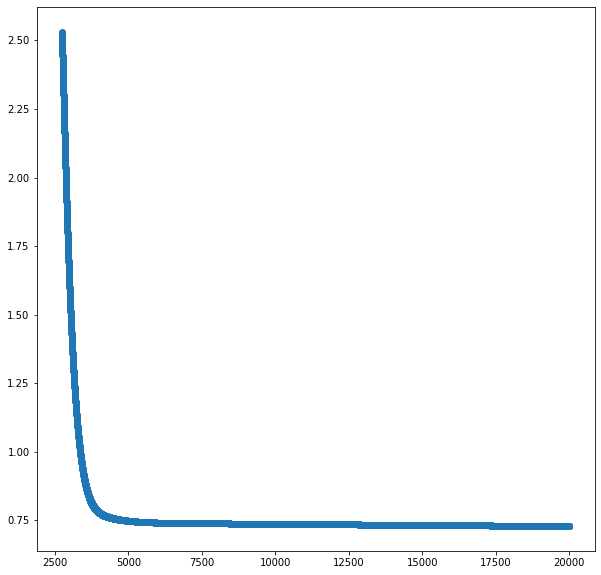

In [129]:
plt.figure(figsize=(10, 10))
plt.scatter(range(0, len(J)), J)
plt.show()


In [130]:
print("The accuracy of the model on it's training data is "+str(acc*100)+"%")

The accuracy of the model on it's training data is 68.23793490460157%
